<a href="https://colab.research.google.com/github/Prags21/SARS-Analysis/blob/master/EDA_Sars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from plotnine import *
import plotly.express as px
import folium

# sars dataset
sars_2003 = pd.read_csv("sars_2003_complete_dataset_clean.csv", parse_dates=['Date'])

# renaming columns
sars_2003.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# latest numbers
lat_no = sars_2003[sars_2003['Date'] == max(sars_2003['Date'])].reset_index()

# latest grouped by country
lat_no_grp = lat_no.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# day index
sars_2003['day_index'] = (sars_2003['Date'] - min(sars_2003['Date'])).dt.days

# new dataset with record of all countries on day basis
sars_db = sars_2003.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# day index
sars_db['day_index'] = sars_2003.groupby('Date')['day_index'].max().values

# no. of countries
temp = sars_2003[sars_2003['Cases']>0]
sars_db['no_of_countries'] = temp.groupby('Date')['Country'].apply(len).values


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [62]:
#deaths to infected :: Bargraph showing deaths/infected country on x
#Death per 100 cases
def my_fun(var1,var2):
  return ((var1/(var2))*100).where(var1 > 0, 0)
lat_no_grp['death_rate'] = my_fun(lat_no_grp.Deaths, lat_no_grp.Cases)
fig = px.bar(lat_no_grp, x="Country", y="death_rate",color='death_rate', title='Deaths to infected')
data = px.data.gapminder()
fig.show()

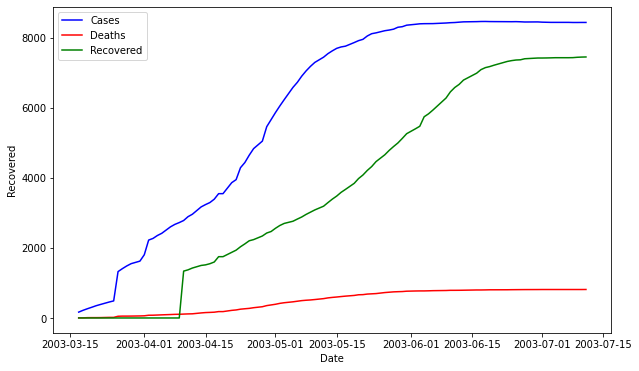

In [63]:

# Graph dipicting cases,deaths and recoveries over the time period in the dataset 
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=sars_db["Date"], 
             y=sars_db["Cases"],
             color='b',
             ax=ax)
sns.lineplot(x=sars_db["Date"], 
             y=sars_db["Deaths"], 
             color='r',
             ax=ax) 
sns.lineplot(x=sars_db["Date"], 
             y=sars_db["Recovered"], 
             color='g',
             ax=ax)    
ax.legend(['Cases', 'Deaths','Recovered'], facecolor='w')
plt.show()


In [64]:
#countrywise numbers of cases,deaths and recoveries  
fig = px.line(sars_2003, x="Date", y="Cases",color='Country',hover_name='Country', title='Number of cases')
fig.show()
fig_1 = px.line(sars_2003, x="Date", y="Deaths",color='Country',hover_name='Country', title='Number of Deaths')
fig_1.show()
fig_2 = px.line(sars_2003, x="Date", y="Recovered",color='Country',hover_name='Country', title='Number of Recoveries')
fig_2.show()


In [65]:
#map showing affected countries according to the intensity
fig = px.choropleth(lat_no_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Emrld", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.show()